<a href="https://colab.research.google.com/github/AnshDar/AQI-Prediction-Temporal-Features/blob/main/AQIPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading dataset to colab

In [ ]:
# Importing libraries
from google.colab import files
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
uploaded = files.upload()

Saving PRSA_Data_Aotizhongxin_20130301-20170228.csv to PRSA_Data_Aotizhongxin_20130301-20170228.csv
Saving PRSA_Data_Changping_20130301-20170228.csv to PRSA_Data_Changping_20130301-20170228.csv
Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228.csv
Saving PRSA_Data_Dongsi_20130301-20170228.csv to PRSA_Data_Dongsi_20130301-20170228.csv
Saving PRSA_Data_Guanyuan_20130301-20170228.csv to PRSA_Data_Guanyuan_20130301-20170228.csv
Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228.csv
Saving PRSA_Data_Huairou_20130301-20170228.csv to PRSA_Data_Huairou_20130301-20170228.csv
Saving PRSA_Data_Nongzhanguan_20130301-20170228.csv to PRSA_Data_Nongzhanguan_20130301-20170228.csv
Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228.csv
Saving PRSA_Data_Tiantan_20130301-20170228.csv to PRSA_Data_Tiantan_20130301-20170228.csv
Saving PRSA_Data_Wanliu_20130301-20170228.csv to PRSA_Data_Wanliu_20130301-2

In [ ]:
# ============================
# 2. Upload and Combine CSVs
# ============================
uploaded = files.upload()  # upload all CSV files

dfs = []
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

Saving PRSA_Data_Aotizhongxin_20130301-20170228.csv to PRSA_Data_Aotizhongxin_20130301-20170228 (1).csv
Saving PRSA_Data_Changping_20130301-20170228.csv to PRSA_Data_Changping_20130301-20170228 (1).csv
Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228 (1).csv
Saving PRSA_Data_Dongsi_20130301-20170228.csv to PRSA_Data_Dongsi_20130301-20170228 (1).csv
Saving PRSA_Data_Guanyuan_20130301-20170228.csv to PRSA_Data_Guanyuan_20130301-20170228 (1).csv
Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228 (1).csv
Saving PRSA_Data_Huairou_20130301-20170228.csv to PRSA_Data_Huairou_20130301-20170228 (1).csv
Saving PRSA_Data_Nongzhanguan_20130301-20170228.csv to PRSA_Data_Nongzhanguan_20130301-20170228 (1).csv
Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228 (1).csv
Saving PRSA_Data_Tiantan_20130301-20170228.csv to PRSA_Data_Tiantan_20130301-20170228 (1).csv
Saving PRSA_Data_Wanliu_20130301-201

Cleaning Data

In [ ]:
# ============================
# 3. Fill Missing Values
# ============================
data.fillna(0, inplace=True)

# ============================
# 4. Create datetime index
# ============================
data["datetime"] = pd.to_datetime(dict(year=data.year, month=data.month, day=data.day, hour=data.hour))
data = data.set_index("datetime").sort_index()

# Drop unused column if exists
data = data.drop(["No"], axis=1, errors="ignore")


Adding Temporal Features

In [ ]:
# ============================
# 5. Feature Engineering
# ============================
def add_features(df):
    for col in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "WSPM"]:
        if col not in df.columns:
            continue
        # Lag features
        for lag in [1, 3, 6, 12, 24]:
            df[f"{col}_lag{lag}"] = df[col].shift(lag)

        # Moving averages
        for win in [3, 6, 12, 24, 48, 168]:
            df[f"{col}_ma{win}"] = df[col].rolling(win).mean()

    # Cyclical encodings
    df["hour_sin"] = np.sin(2 * np.pi * df.index.hour / 24)
    df["hour_cos"] = np.cos(2 * np.pi * df.index.hour / 24)
    df["month_sin"] = np.sin(2 * np.pi * df.index.month / 12)
    df["month_cos"] = np.cos(2 * np.pi * df.index.month / 12)

    return df

data = add_features(data)
data = data.dropna()  # drop rows with NaN after lag/MA

/tmp/ipython-input-1606175635.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_ma{win}"] = df[col].rolling(win).mean()
/tmp/ipython-input-1606175635.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_ma{win}"] = df[col].rolling(win).mean()
/tmp/ipython-input-1606175635.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-

Encode Categorical Columns

In [ ]:
# ============================
# 6. Encode Categorical Columns
# ============================
categorical_cols = ['wd', 'station']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

Time Series Split

In [ ]:
# ============================
# 7. Time Series Split Function
# ============================
def time_series_split(df, target_col="PM2.5", test_size=0.2):
    df = df.dropna()
    split_idx = int(len(df) * (1 - test_size))
    train, test = df.iloc[:split_idx], df.iloc[split_idx:]

    X_train = train.drop(columns=[target_col])
    y_train = train[target_col]
    X_test = test.drop(columns=[target_col])
    y_test = test[target_col]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = time_series_split(data, target_col="PM2.5")

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (336480, 155)
Test shape: (84121, 155)


Function to Evaluate a Model

In [ ]:
# ============================
# 8. Function to Evaluate a Model
# ============================
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n=== {model_name} Results ===")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    # Feature Importance (if available)
    if hasattr(model, "feature_importances_"):
        importance = pd.DataFrame({
            "Feature": X_train.columns,
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)
        print("\nTop 15 Feature Importances:")
        print(importance.head(15))

        # Plot top 15
        plt.figure(figsize=(10,6))
        plt.barh(importance["Feature"].head(15)[::-1], importance["Importance"].head(15)[::-1])
        plt.title(f"{model_name} - Feature Importance")
        plt.show()

In [ ]:
print(data.dtypes)

year            int64
month           int64
day             int64
hour            int64
PM2.5         float64
               ...   
WSPM_ma168    float64
hour_sin      float64
hour_cos      float64
month_sin     float64
month_cos     float64
Length: 131, dtype: object


Train Each Model Individually - Decision Tree


=== Decision Tree Results ===
R² Score: 0.9473
Mean Absolute Error (MAE): 9.0329
Root Mean Squared Error (RMSE): 19.1310

Top 15 Feature Importances:
        Feature  Importance
19    PM2.5_ma3    0.854430
4          PM10    0.097480
30     PM10_ma3    0.010099
14   PM2.5_lag1    0.008309
7            CO    0.001310
20    PM2.5_ma6    0.001162
6           NO2    0.000995
22   PM2.5_ma24    0.000796
21   PM2.5_ma12    0.000766
23   PM2.5_ma48    0.000732
36     SO2_lag1    0.000686
44     SO2_ma24    0.000661
24  PM2.5_ma168    0.000601
25    PM10_lag1    0.000596
17  PM2.5_lag12    0.000586


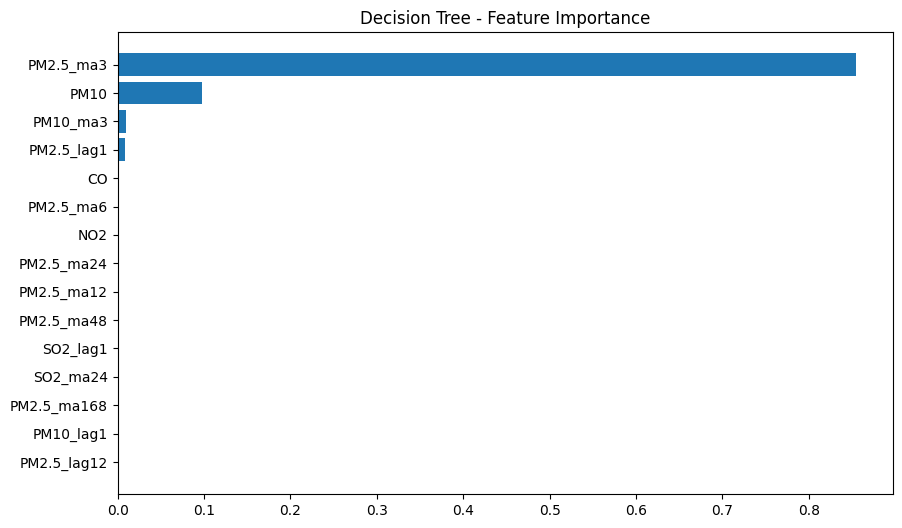

In [ ]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")

Train Each Model Individually - Random Forest

Train Each Model Individually - XGBoost

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:46:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost (GPU) Results ===
R² Score: 0.9778
Mean Absolute Error (MAE): 6.1995
Root Mean Squared Error (RMSE): 12.4178

Top 15 Feature Importances:
        Feature  Importance
20    PM2.5_ma6    0.417793
19    PM2.5_ma3    0.307607
4          PM10    0.053971
21   PM2.5_ma12    0.032192
109   DEWP_ma12    0.007320
123  WSPM_ma168    0.006910
7            CO    0.006284
14   PM2.5_lag1    0.004891
30     PM10_ma3    0.004628
38     SO2_lag6    0.004382
22   PM2.5_ma24    0.003970
23   PM2.5_ma48    0.003570
127   month_cos    0.003482
81    TEMP_lag3    0.003393
31     PM10_ma6    0.003380


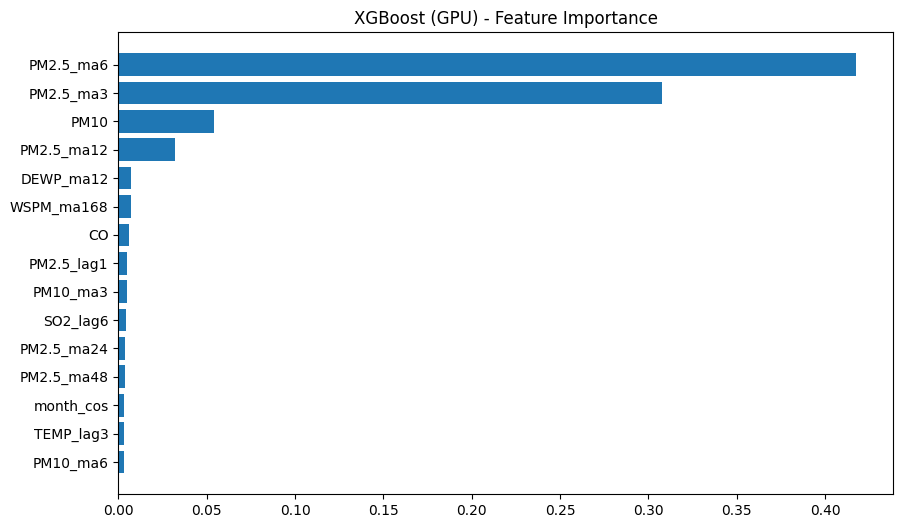

In [ ]:
xgb_model = XGBRegressor(
n_estimators=200,
learning_rate=0.1,
max_depth=6,
subsample=0.8,
colsample_bytree=0.8,
random_state=42,
predictor='gpu_predictor',
n_jobs=-1
)
evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost (GPU)")



=== Random Forest Results ===
R² Score: 0.9761
Mean Absolute Error (MAE): 5.8104
Root Mean Squared Error (RMSE): 12.8882

Top 15 Feature Importances:
        Feature  Importance
19    PM2.5_ma3    0.853374
4          PM10    0.097043
30     PM10_ma3    0.009354
14   PM2.5_lag1    0.008339
20    PM2.5_ma6    0.001394
7            CO    0.001332
21   PM2.5_ma12    0.001023
22   PM2.5_ma24    0.000843
23   PM2.5_ma48    0.000662
6           NO2    0.000661
43     SO2_ma12    0.000658
25    PM10_lag1    0.000624
5           SO2    0.000621
17  PM2.5_lag12    0.000605
24  PM2.5_ma168    0.000545


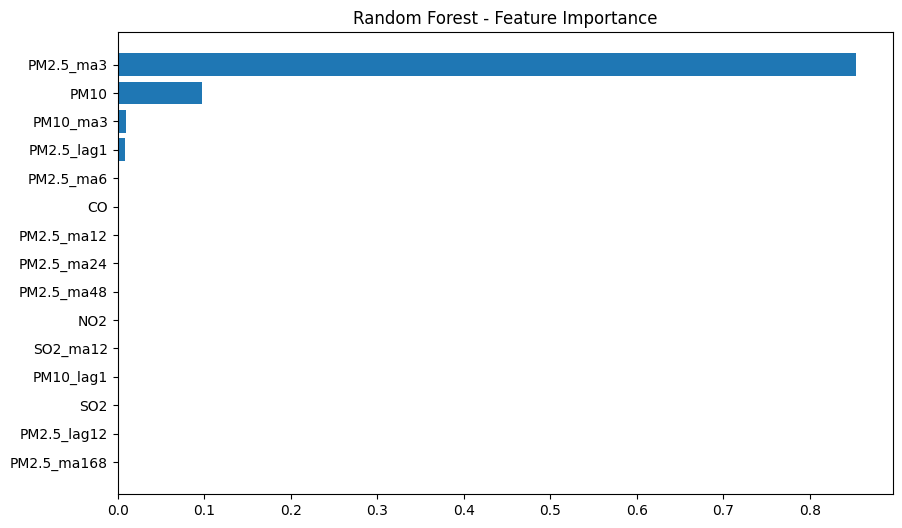

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(data.head(3))

                     year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  \
datetime                                                                     
2013-03-01 13:00:00  2013      3    1    13    3.0   6.0  7.0  12.0  400.0   
2013-03-01 14:00:00  2013      3    1    14    6.0   7.0  3.0  22.0  200.0   
2013-03-01 14:00:00  2013      3    1    14    3.0  14.0  7.0   8.0  300.0   

                       O3  TEMP    PRES  DEWP  RAIN  wd  WSPM        station  \
datetime                                                                       
2013-03-01 13:00:00  76.0   5.3  1026.2 -19.3   0.0  NW   4.3   Aotizhongxin   
2013-03-01 14:00:00  89.0   5.9  1022.6 -20.5   0.0   N   3.6       Dingling   
2013-03-01 14:00:00  72.0   6.6  1024.9 -19.9   0.0  NW   2.1  Wanshouxigong   

                     PM2.5_lag1  PM2.5_lag3  PM2.5_lag6  PM2.5_lag12  \
datetime                                                               
2013-03-01 13:00:00        10.0        10.0         3.0         